# Online Shoppers Intention

## Задание 1: Исследование поведения пользователей и прогнозирование вероятности покупки

**Автор:** Собченко Анастасия Алексеевна   
**Дата:** 29 сентября 2024 г.  
**Версия:** 1.0  

---

## Описание проекта

1. Анализ данных: ◦ Исследуйте распределение данных в каждом столбце, определите основные статистические характеристики (среднее, медиану, моду, стандартное отклонение). ◦ Определите корреляции между признаками и выявите, какие из них наиболее сильно связаны с целевой переменной (Revenue). 

2. Предобработка данных: ◦ Обработайте пропуски в данных (если есть).  Преобразуйте категориальные переменные (Month, VisitorType) в числовой формат.  Нормализуйте или стандартизируйте данные, если это необходимо. 

3. Построение модели: ◦ Разделите данные на обучающую и тестовую выборки. ◦ Постройте модель машинного обучения (например, логистическую регрессию, случайный лес) для прогнозирования вероятности покупки (Revenue). ◦ Оцените качество модели с помощью метрик (точность, полнота, F1-score). 

4. Интерпретация результатов: ◦ Определите, какие признаки оказывают наибольшее влияние на вероятность покупки. ◦ Напишите отчет с рекомендациями для улучшения пользовательского опыта на основе выявленных данных.

---

## Содержание

1. [Анализ данных](#1.-Анализ-данных)

- 1.1. [Импорт библиотек. Загрузка данных](#1.1.-Импорт-библиотек.-Загрузка-данных)
- 1.2. [Анализ целевой переменной Revenue](#1.2.-Анализ-целевой-переменной-Revenue)
- 1.3. [Исследовательский анализ данных (EDA)](#1.3.-Исследовательский-анализ-данных-(EDA))
- 1.4. [Корреляции](#1.4.-Корреляции)
- 1.5. [Анализ других признаков](#1.5.-Анализ-других-признаков)

2. [Модели](#2.-Модели)

- 2.1. [Подготовка данных](#2.1.-Подготовка-данных)
- 2.2. [Логистическая регрессия (Logistic Regression)](#2.2.-Логистическая-регрессия-(Logistic-Regression))
- 2.3. [Метод k ближайших соседей (K Nearest Neighbors)](#2.3.-Метод-k-ближайших-соседей-(K-Nearest-Neighbors))
- 2.4. [Случайный лес (RandomForestClassifier)](#2.4.-Случайный-лес-(RandomForestClassifier))
- 2.5. [CatBoost классификатор](#2.5.-CatBoost-классификатор)
- 2.6. [XGBoost классификатор](#2.6.-XGBoost-классификатор)

3. [Заключение](#3.-Заключение)


---

## Контакты

**Email:** lobzinastya@gmail.com  

# 1. Анализ данных

## 1.1. Импорт библиотек. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import xgboost as xgb



from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import silhouette_score

#Настройки оформления
sns.set_style('white') 
palette_color = sns.color_palette('viridis', n_colors = 7)
two_colors = [palette_color[0],palette_color[-1]]

pd.set_option('display.max_columns', None)

# import warnings
# warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
file_path = ''
df = pd.read_csv(file_path + 'online_shoppers_intention.csv')
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Проверили наличие пропущенных значений, их нет

Описательная статистика для числовых переменных:

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


Описательная статистика для переменных типа object и булевских

In [5]:
df.describe(include=['object','bool']).T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551
Weekend,12330,2,False,9462
Revenue,12330,2,False,10422


## 1.2. Анализ целевой переменной Revenue

Подробнее про распределение значений в целевой переменной Revenue

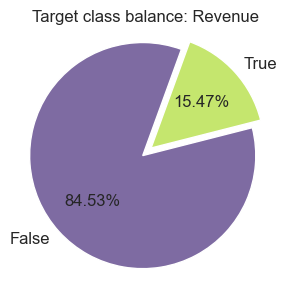

Revenue
False    10422
True      1908
Name: count, dtype: int64


In [6]:
rev_summary = df['Revenue'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(
    rev_summary,
    labels=['False','True'],
    colors =[(*i, 0.7) for i in two_colors],
    startangle=70,
    autopct='%1.2f%%',
    explode = [0, 0.1],
    textprops={'fontsize': 12},
)
plt.title('Target class balance: Revenue')
plt.axis('equal')
plt.tight_layout()
plt.show()

print(rev_summary)

## 1.3. Исследовательский анализ данных (EDA)

### Признак Month

In [7]:
df['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

In [8]:
# Стандартные названия для месяцев
import calendar
month_names = {calendar.month_abbr[i]:i for i in range(1,13)}
print(month_names)

{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}


В данных есть June вместо традиционного сокращения Jun, исправим это

In [9]:
# Найдем и исправим неправильное написание июня
df.loc[df['Month'] == 'June','Month'] = 'Jun'

Построим по месяцам распределения количества значений True и False для целевой переменной Revenue

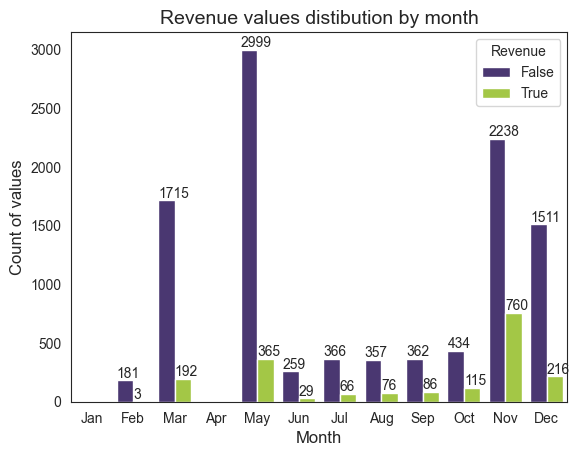

In [10]:
ax = sns.countplot(df, x ='Month', hue = 'Revenue', palette = two_colors, order=month_names)
for p in ax.patches[:-2]:
    ax.annotate(f"{p.get_height():.0f}", xy=(p.get_x(), p.get_height()), va = 'bottom')
    
plt.ylabel('Count of values', size=12)
plt.xlabel('Month', size=12)
plt.title('Revenue values distibution by month', size = 14)
plt.show()

Данные очень неравномерно распределены по месяцам.
По какой-то причине полностью отсутствуют данные за апрель. Данные по февралю возможно начинаются не с начала месяца.

Если бы это был настоящий датасет, а не учебный проект, следовало бы узнать и собрать недостающие данные

### Признак VisitorType

In [11]:
df['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

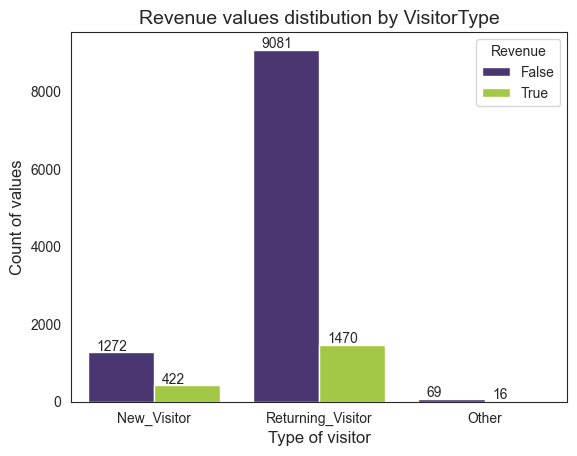

In [12]:
ax = sns.countplot(df, x ='VisitorType', hue = 'Revenue', palette = two_colors, order= ['New_Visitor', 'Returning_Visitor', 'Other'])
for p in ax.patches[:-2]:
    ax.annotate(f"{p.get_height():.0f}", xy=(p.get_x()+0.05, p.get_height()+50))
plt.ylabel('Count of values', size=12)
plt.xlabel('Type of visitor', size=12)
plt.title('Revenue values distibution by VisitorType', size = 14)
plt.show()

### Построение графиков Pairplot


In [13]:
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  Weekend               

In [14]:
#Если не сделать этот шаг, то pairplot не включит булевские Weekend
#df['Weekend'] = df['Weekend'].astype('int8')

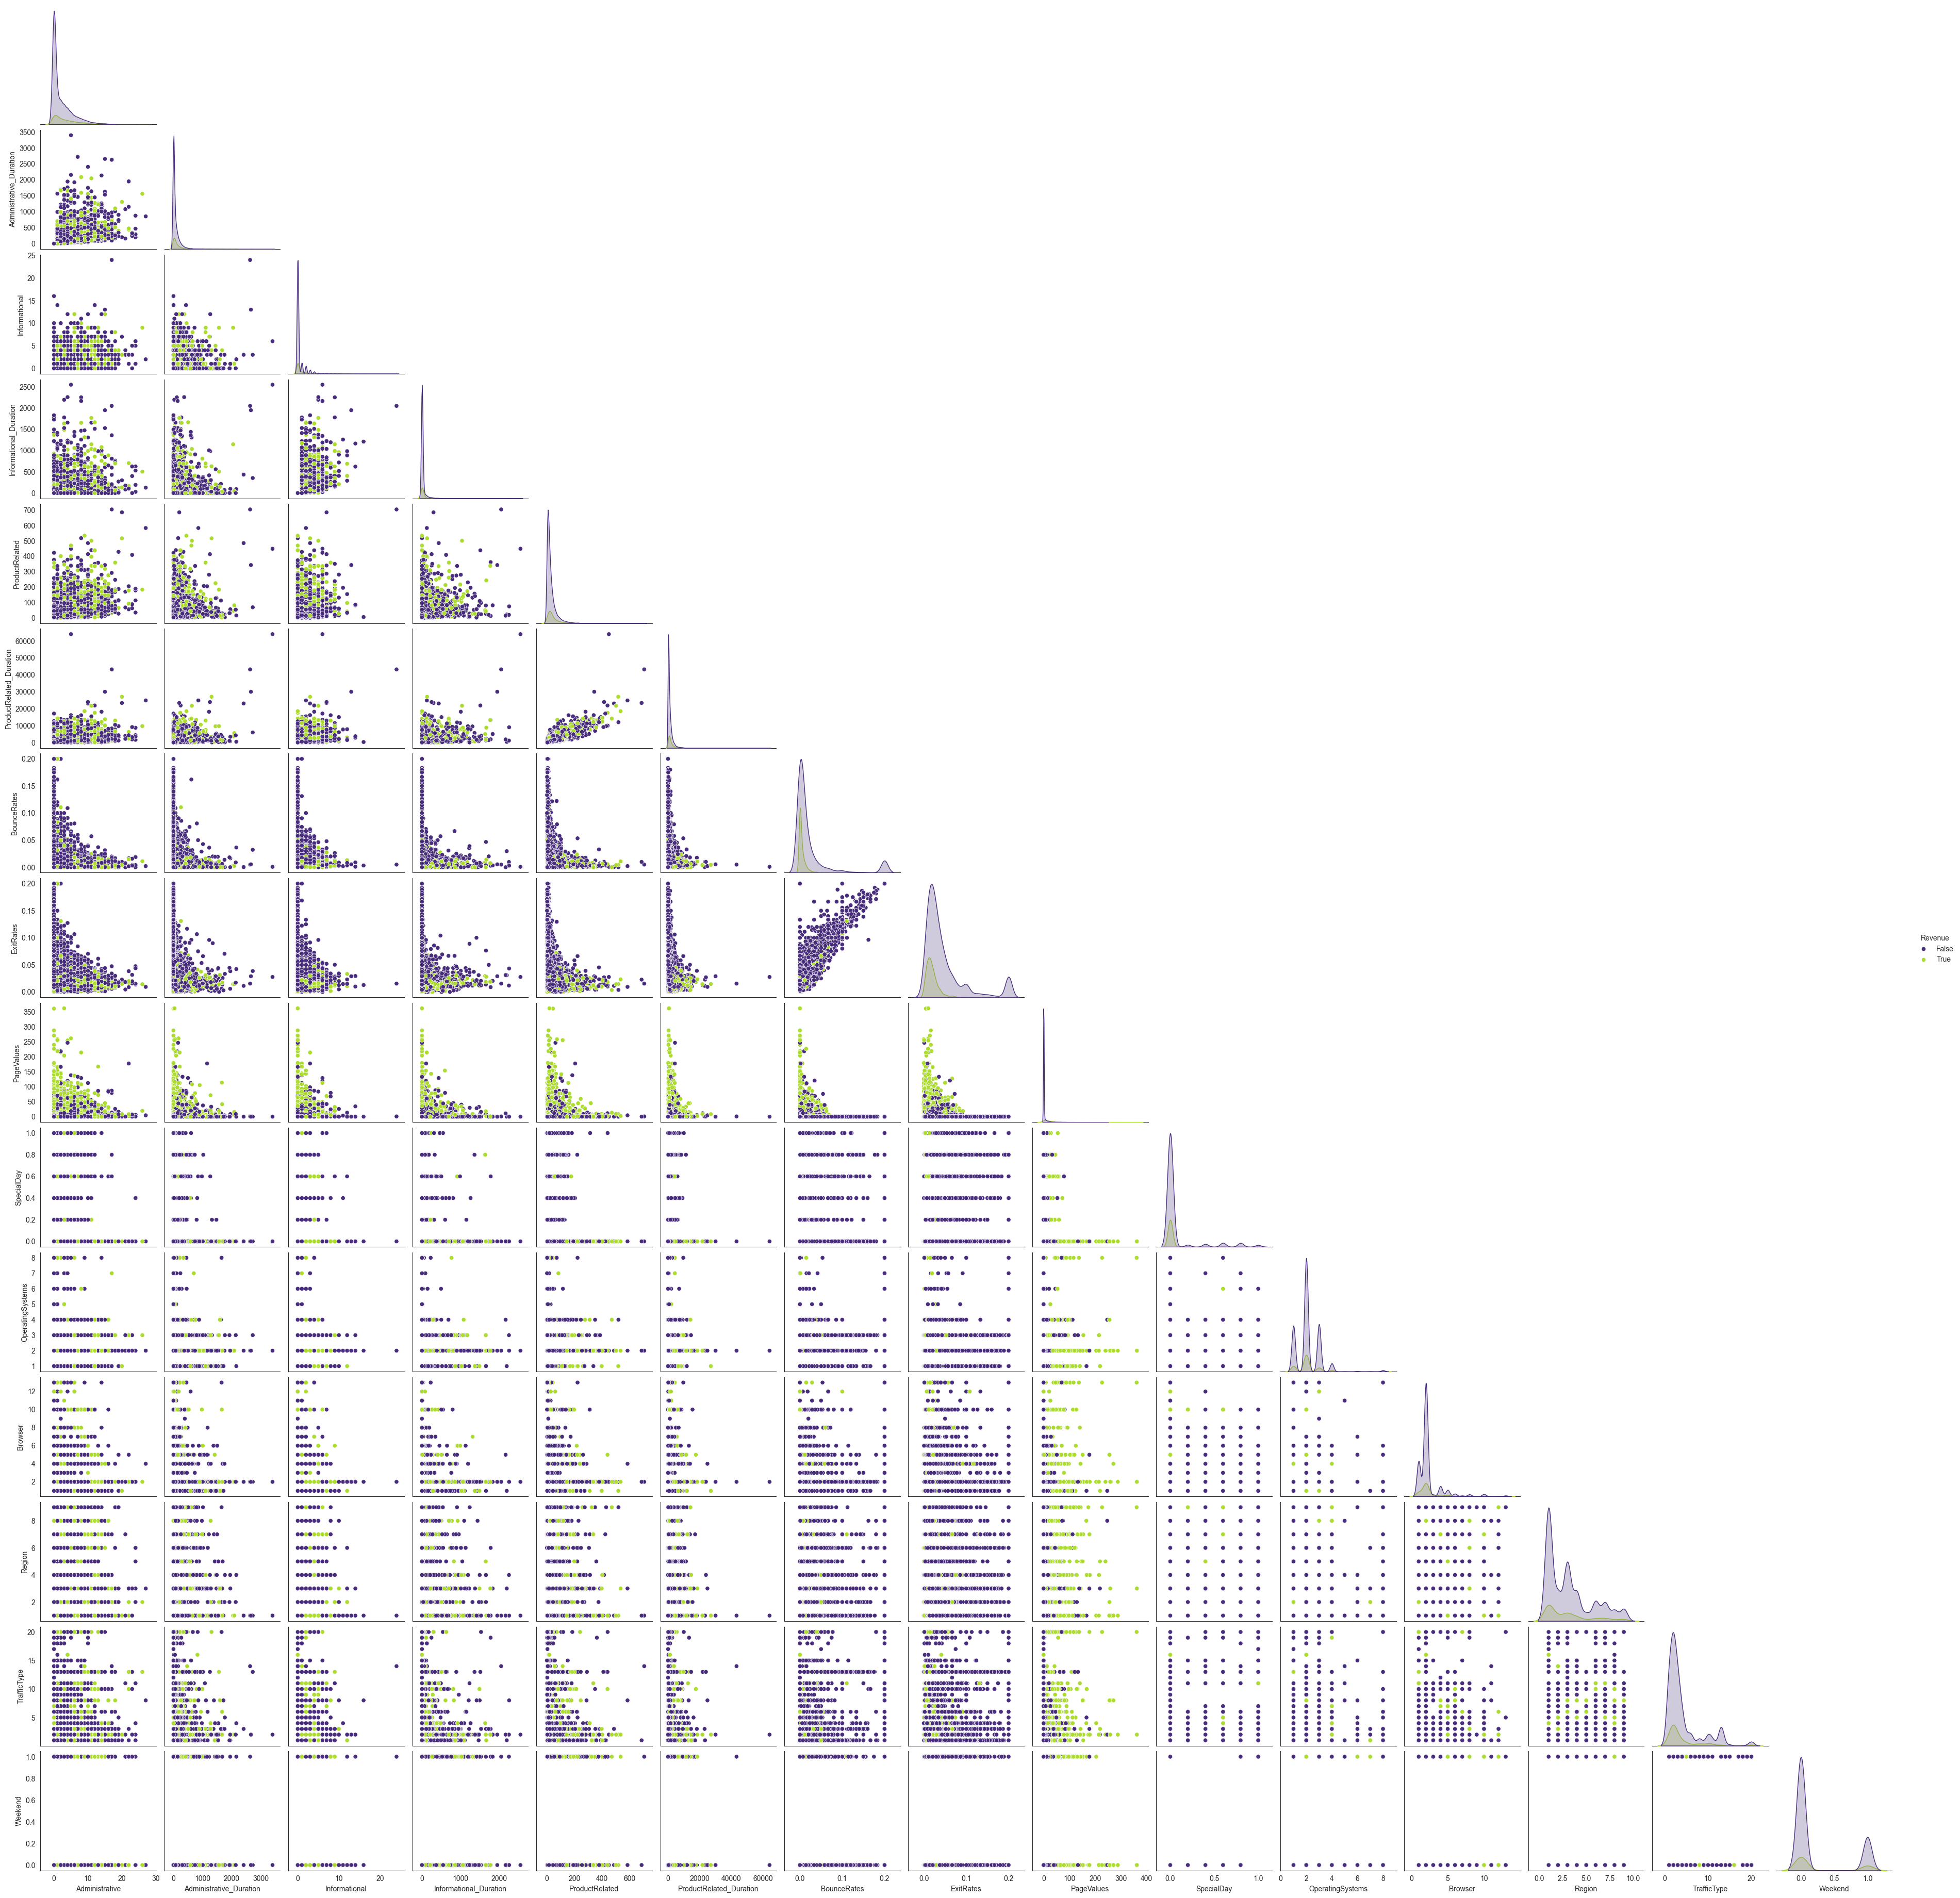

In [14]:
df['Weekend'] = df['Weekend'].astype('int8')
sns.pairplot(df, corner = True, palette = two_colors, hue='Revenue')
plt.savefig('pairplot_output.png')
plt.show()

## 1.4. Корреляции

Корреляционная матрица для всех признаков, кроме категориальных

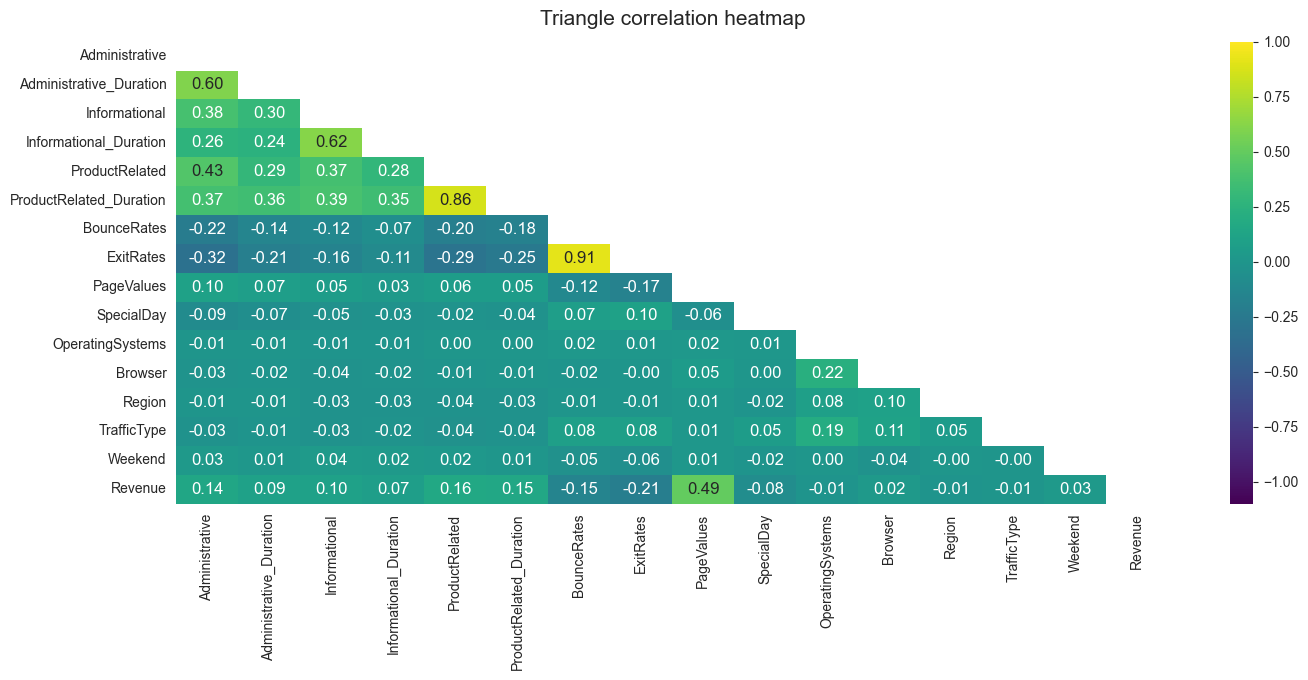

In [15]:
corr_matr = df.select_dtypes(exclude=['object']).corr()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr_matr, dtype='bool'))
heatmap = sns.heatmap(corr_matr, mask=mask,vmin=1, vmax=-1, annot=True,fmt=".2f", cmap=sns.color_palette("viridis", as_cmap=True), annot_kws={'size': 12})
heatmap.set_title('Triangle correlation heatmap', fontdict={'fontsize':15}, pad=12)
plt.show()

Корреляции всех признаков с целевой переменной

In [16]:
revenue_corr = pd.DataFrame(corr_matr['Revenue']).rename(columns={'Revenue':'corr_coef'})
revenue_corr.drop(index='Revenue', inplace=True)
revenue_corr.sort_values(by='corr_coef', key=abs, ascending = False, inplace=True)

Визуализируем признаки, отсортированные по модулю коэффициента корреляции с целевой переменной для наглядности:

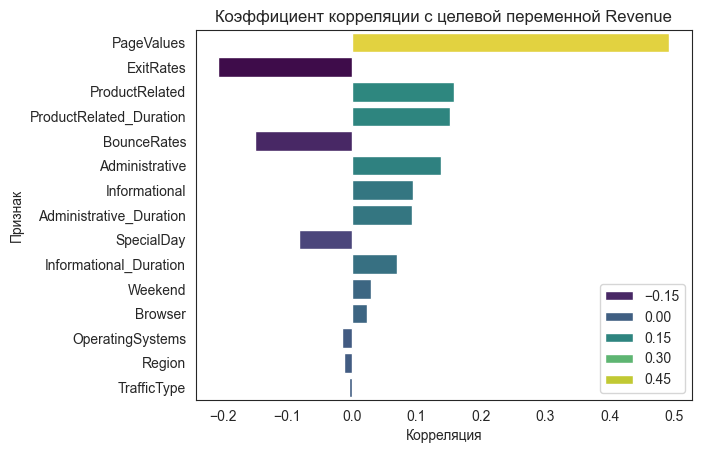

,corr_coef
PageValues,0.492569
ExitRates,-0.207071
ProductRelated,0.158538
ProductRelated_Duration,0.152373
BounceRates,-0.150673
Administrative,0.138917
Informational,0.095200
Administrative_Duration,0.093587
SpecialDay,-0.082305
Informational_Duration,0.070345


In [17]:
ax = sns.barplot(data=revenue_corr, y=revenue_corr.index, x= 'corr_coef', hue= 'corr_coef', palette='viridis')
plt.ylabel('Признак', fontsize=10)  
plt.xlabel('Корреляция', fontsize=10)  
plt.grid(False)
#sns.despine(left=True, bottom=True)
plt.title('Коэффициент корреляции с целевой переменной Revenue', fontsize=12)
plt.legend(loc='lower right')
plt.show()

revenue_corr

## 1.5. Анализ других признаков

Рассмотрим некоторые из features - 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType' и какой процент Revenue=True для разных значений из этих категорий

In [18]:
few_columns = ['SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

for feature in few_columns:
    df0 = pd.DataFrame(df[['Revenue',feature]].groupby([feature],as_index = True).agg(
        Revenue_total_count = ('Revenue', 'count'),
        Revenue_True = ('Revenue', 'sum')
        ))
    df0['Percentage_of_True']=round(df0['Revenue_True']/df0['Revenue_total_count']*100,2)
    df0 = df0.sort_values(by='Percentage_of_True', ascending=False)
    print(df0, end='\n\n')

            Revenue_total_count  Revenue_True  Percentage_of_True
SpecialDay                                                       
0.0                       11079          1831               16.53
0.6                         351            29                8.26
0.2                         178            14                7.87
1.0                         154            10                6.49
0.4                         243            13                5.35
0.8                         325            11                3.38

                  Revenue_total_count  Revenue_True  Percentage_of_True
OperatingSystems                                                       
8                                  79            17               21.52
4                                 478            85               17.78
2                                6601          1155               17.50
5                                   6             1               16.67
1                                2585  

Также из этих данных видно, что данные признаки принимают детерминированные, дискретные значения. Их можно рассматривать как категориальные

Построим аналогичные таблицы для признаков 'Administrative', 'Informational', 'ProductRelated' 

In [19]:
other_columns = ['Administrative', 'Informational', 'ProductRelated']

for feature in other_columns:
    df0 = pd.DataFrame(df[['Revenue',feature]].groupby([feature],as_index = True).agg(
        Revenue_total_count = ('Revenue', 'count'),
        Revenue_True = ('Revenue', 'sum')
        ))
    df0['Percentage_of_True']=round(df0['Revenue_True']/df0['Revenue_total_count']*100,2)
    df0 = df0.sort_values(by='Percentage_of_True', ascending=False)
    print(df0, end='\n\n')

                Revenue_total_count  Revenue_True  Percentage_of_True
Administrative                                                       
26                                1             1              100.00
22                                4             2               50.00
20                                2             1               50.00
13                               56            19               33.93
16                               24             8               33.33
11                              105            31               29.52
14                               44            12               27.27
9                               225            61               27.11
6                               432           111               25.69
8                               287            73               25.44
17                               16             4               25.00
12                               86            21               24.42
1                   

# 2. Модели


## 2.1. Подготовка данных

Преобразуем категориальные переменные (Month, VisitorType) в числовой формат с помощью get_dummies,
преобразуем булевские переменные Weekend, Revenue к целому типу данных.

In [20]:
df[['Weekend','Revenue']] = df[['Weekend','Revenue']].astype('int8')

In [21]:
df0 = pd.get_dummies(df, columns=['VisitorType', 'Month'], prefix=['VT', ''],prefix_sep=['_',''], dtype='int8')
df0

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VT_New_Visitor,VT_Other,VT_Returning_Visitor,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [22]:
print('Размеры подготовленного датасета:', df0.shape)

Размеры подготовленного датасета: (12330, 29)


Разделим данные на тренировочную и тестовую часть

In [23]:
X = df0.drop(columns = 'Revenue')
y = df0['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
print(f"Размеры обучающей выборки: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Размеры тестовой выборки: X_test {X_test.shape}, y_test {y_test.shape}")


Размеры обучающей выборки: X_train (11097, 28), y_train (11097,)
Размеры тестовой выборки: X_test (1233, 28), y_test (1233,)


Стандартизируем данные (уже после разделения на train и test, обучим standard scaler только на обучающей части)

In [24]:
stscaler =  StandardScaler().fit(X_train)
X_scaled = stscaler.transform(X_train)
X_test_scaled = stscaler.transform(X_test)

X_scaled

array([[-0.39543103, -0.36971727,  0.38362134, ..., -0.56899073,
        -0.21744423, -0.19412543],
       [-0.6968528 , -0.45359349, -0.39892388, ..., -0.56899073,
        -0.21744423, -0.19412543],
       [ 2.01594312,  0.82244351,  0.38362134, ...,  1.75749789,
        -0.21744423, -0.19412543],
       ...,
       [-0.6968528 , -0.45359349, -0.39892388, ..., -0.56899073,
        -0.21744423, -0.19412543],
       [-0.6968528 , -0.45359349, -0.39892388, ..., -0.56899073,
        -0.21744423, -0.19412543],
       [ 1.41309958,  0.31890656, -0.39892388, ..., -0.56899073,
         4.59888036, -0.19412543]])

Чтобы аггрегировать итоги работы разных моделей подготовим таблицу с результатами метрик на тестовом датасете

In [25]:
results = pd.DataFrame(columns = ['Название модели', 'Accuracy', 'ROC_AUC', 'F1',	'Recall',	'Precision'])
results

,Название модели,Accuracy,ROC_AUC,F1,Recall,Precision


Также будем собирать все предсказания вероятностей класса модели в отдельный список, который понадобится потом для roc_auc кривых 

In [26]:
predictions_proba = []

Фунция для вывода матрицы ошибок

In [27]:
def my_confusion_matrix(y_test, y_pred, model, model_name):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    fig, ax = plt.subplots(figsize=(4, 4)) 
    disp.plot(ax=ax, cmap='viridis_r', values_format='') 
    plt.title(f'CM for {model_name}', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('True label', fontsize=12)
    plt.grid(False)
    plt.show()

Функция для подсчета значений метрик по истинным и предсказанным значениям

In [28]:
def my_metrics(y_test, y_pred, y_pred_proba, i=1):
    accuracy =  accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba[:,i])
    precision =  precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 =  f1_score(y_test, y_pred)
    return [accuracy, roc_auc, f1, precision, recall]

    

## 2.2. Логистическая регрессия (Logistic Regression)

In [29]:
lr_model = LogisticRegression()
lr_model.fit(X_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)

predictions_proba.append(y_pred_proba[:,1])

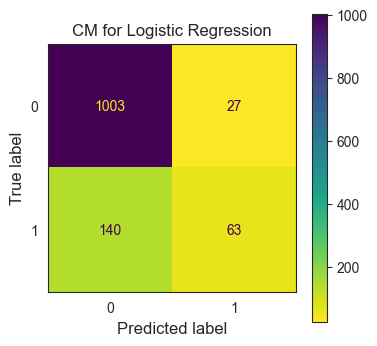

,Название модели,Accuracy,ROC_AUC,F1,Recall,Precision
0,Logistic Regression,0.864558,0.880453,0.430034,0.7,0.310345


In [30]:
my_confusion_matrix(y_test, y_pred, lr_model, 'Logistic Regression')
results.loc[len(results)] = ['Logistic Regression'] + my_metrics(y_test, y_pred, y_pred_proba, i=1)
results

Для оценки важности признаков модели используем получившиеся коэффициенты логистической регрессии. 

Данные были стандартизированы, а значит важность через коэффициенты будет отражаться корректно. Но для оценки именно величины влияния коэффициента (а не +\- направления влияния, предлагаю сортировать полученные данные важности по модулю коэффициента)

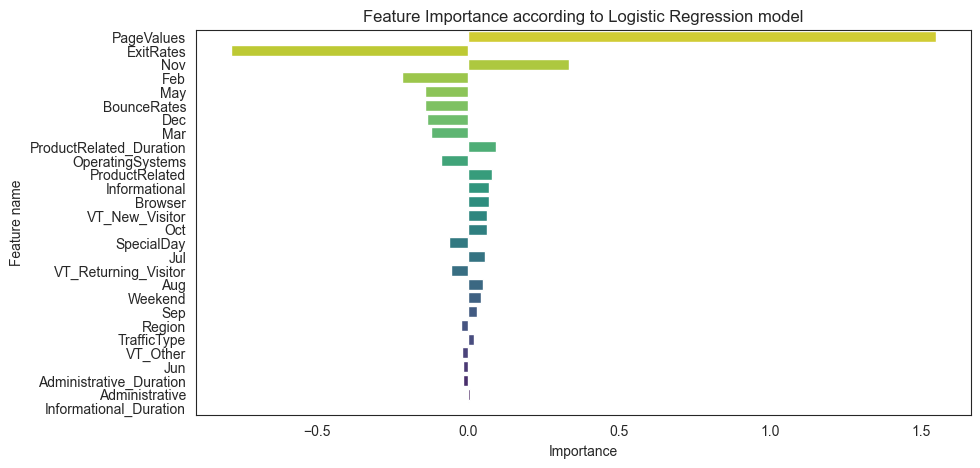

Самые значимые 10 признаков:


,Importance
PageValues,1.549362
ExitRates,-0.783737
Nov,0.333738
Feb,-0.219101
May,-0.141026
BounceRates,-0.140713
Dec,-0.133527
Mar,-0.123419
ProductRelated_Duration,0.094201
OperatingSystems,-0.088030


In [31]:
feature_importance_logreg = pd.DataFrame({'Importance': lr_model.coef_[0]}, index=X_test.columns).sort_values(by='Importance', key=abs, ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(y = feature_importance_logreg.index, x = feature_importance_logreg['Importance'], hue = feature_importance_logreg.index, palette='viridis_r')
plt.title('Feature Importance according to Logistic Regression model')
plt.ylabel('Feature name')
plt.show()

print('Самые значимые 10 признаков:')
feature_importance_logreg.head(10)

## 2.3. Метод k ближайших соседей (K Nearest Neighbors)

Построим модель k-ближайших соседей с параметрами по умолчанию (=5)

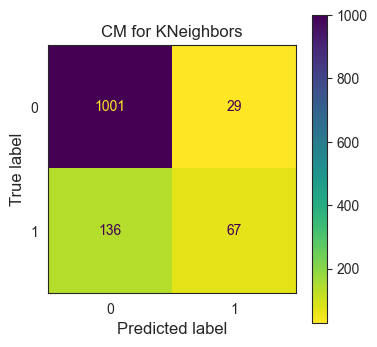

In [32]:
knn_model_0 = KNeighborsClassifier()
knn_model_0.fit(X_scaled, y_train)
y_pred = knn_model_0.predict(X_test_scaled)
y_pred_proba = knn_model_0.predict_proba(X_test_scaled)
predictions_proba.append(y_pred_proba[:,1])
my_confusion_matrix(y_test, y_pred, knn_model_0, 'KNeighbors')

In [33]:
results.loc[len(results)] = ['KNN (default, 5)'] + my_metrics(y_test, y_pred, y_pred_proba, i=1)
results

,Название модели,Accuracy,ROC_AUC,F1,Recall,Precision
0,Logistic Regression,0.864558,0.880453,0.430034,0.700000,0.310345
1,"KNN (default, 5)",0.866180,0.778292,0.448161,0.697917,0.330049


С помощью перебора параметров c кроссвалидацией (на обучающей выборке) GridSearchСV, найдем лучшее значение параметра (число соседей). Ищем лучший по метрике accuracy, но только для train 

In [34]:
params = {'n_neighbors': range(1,15)}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid=params, n_jobs=-1, cv=5, scoring='accuracy') 
grid_search.fit(X_scaled, y_train)

# Получение лучшего значения K
best_k = grid_search.best_params_['n_neighbors']
print(f"Лучшее значение параметра K: {best_k}")

Лучшее значение параметра K: 9


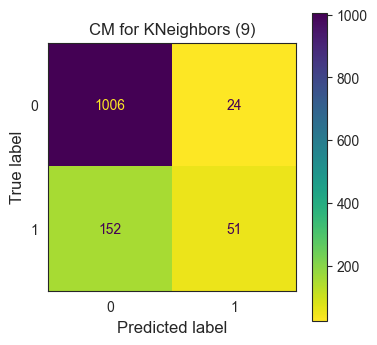

,Название модели,Accuracy,ROC_AUC,F1,Recall,Precision
0,Logistic Regression,0.864558,0.880453,0.430034,0.700000,0.310345
1,"KNN (default, 5)",0.866180,0.778292,0.448161,0.697917,0.330049
2,KNN (9),0.857259,0.808618,0.366906,0.680000,0.251232


In [35]:
knn_model = KNeighborsClassifier(best_k)
knn_model.fit(X_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
y_pred_proba = knn_model.predict_proba(X_test_scaled)
predictions_proba.append(y_pred_proba[:,1])

my_confusion_matrix(y_test, y_pred, knn_model, 'KNeighbors (9)')
results.loc[len(results)] = [f'KNN ({best_k})'] + my_metrics(y_test, y_pred, y_pred_proba, i=1)
results

На тестовой выборке оказалось, что модель с 9 соседями дает точность хуже, чем дефолтная с 5. Но зато эта модель лучше по метрике roc_auc

Для оценки важности признаков в построенной модели KNN применим подход permutation_importance (перемешивании значений одного из признаков и измерении влияния на качество предсказаний; признак считается важным, если точность модели снижается при его перемешивании)

Будем использовать первую из рассмотренных knn моделей (5, дефолтную)

In [36]:
%%time
permutation_result = permutation_importance(knn_model_0, X_test_scaled, y_test, n_repeats=20, random_state=42)
feature_importance_knn = pd.DataFrame({'Importance':np.round(permutation_result.importances_mean,6)}, index=X_test.columns).sort_values(by='Importance', ascending = False)

CPU times: total: 53.2 s
Wall time: 39.8 s


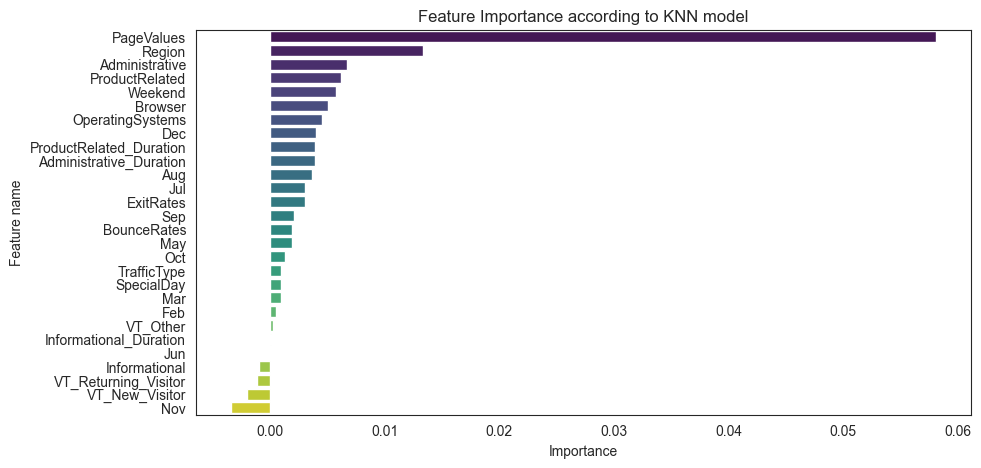

Самые значимые 10 признаков:


,Importance
PageValues,0.058070
Region,0.013341
Administrative,0.006732
ProductRelated,0.006164
Weekend,0.005758
Browser,0.005028
OperatingSystems,0.004501
Dec,0.004015
ProductRelated_Duration,0.003933
Administrative_Duration,0.003933


In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(y = feature_importance_knn.index, x = feature_importance_knn['Importance'], hue = feature_importance_knn.index, palette='viridis')
plt.title('Feature Importance according to KNN model')
plt.ylabel('Feature name')
plt.show()

print('Самые значимые 10 признаков:')
feature_importance_knn.head(10)

## 2.4. Случайный лес (RandomForestClassifier)

In [38]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)
predictions_proba.append(y_pred_proba[:,1])

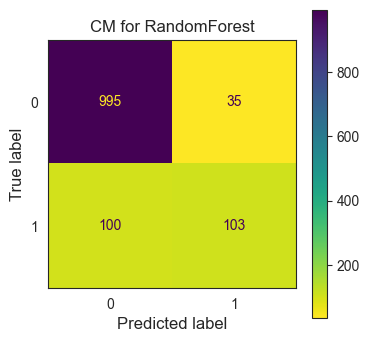

,Название модели,Accuracy,ROC_AUC,F1,Recall,Precision
0,Logistic Regression,0.864558,0.880453,0.430034,0.700000,0.310345
1,"KNN (default, 5)",0.866180,0.778292,0.448161,0.697917,0.330049
2,KNN (9),0.857259,0.808618,0.366906,0.680000,0.251232
3,RandomForest,0.890511,0.920085,0.604106,0.746377,0.507389


In [39]:
my_confusion_matrix(y_test, y_pred, rf_model, 'RandomForest')
results.loc[len(results)] = [f'RandomForest'] + my_metrics(y_test, y_pred, y_pred_proba, i=1)
results

Для оценки важности признака воспользуемся встроенным в модель feature_importances_

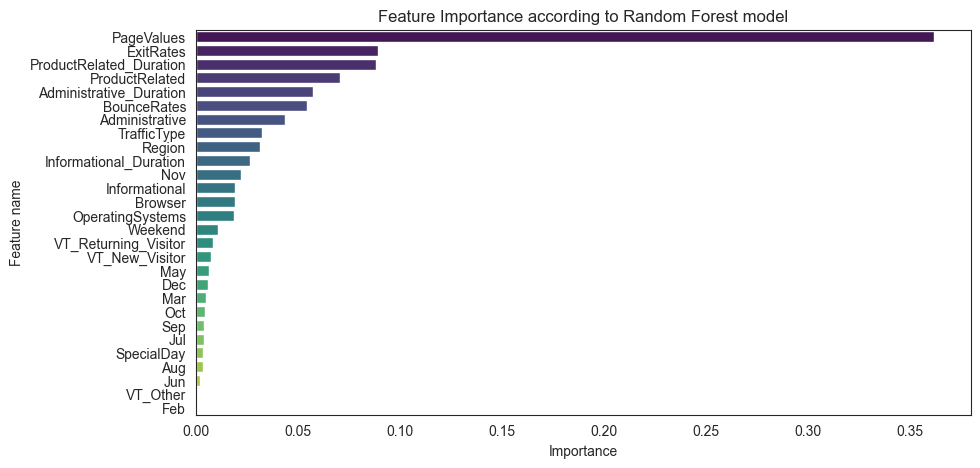

Самые значимые 10 признаков:


,Importance
PageValues,0.361589
ExitRates,0.088996
ProductRelated_Duration,0.088139
ProductRelated,0.070359
Administrative_Duration,0.057207
BounceRates,0.054401
Administrative,0.043747
TrafficType,0.032551
Region,0.031238
Informational_Duration,0.026623


In [40]:
feature_importance_rf = pd.DataFrame({'Importance': rf_model.feature_importances_}, index = X_train.columns).sort_values(by='Importance', ascending = False)

plt.figure(figsize=(10, 5))
sns.barplot(y = feature_importance_rf.index, x = feature_importance_rf['Importance'], hue = feature_importance_rf.index, palette='viridis')
plt.title('Feature Importance according to Random Forest model')
plt.ylabel('Feature name')
plt.show()

print('Самые значимые 10 признаков:')
feature_importance_rf.head(10)

### Подбор гиперпараметров модели RandomForest (GridSearchCV)

In [41]:
%%time

params = {
    'n_estimators': [100, 500, 1000],        
    'max_depth': [None, 10, 20],         
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4]      
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=params,scoring='accuracy', n_jobs=-1, cv=5, verbose=2)
grid_search.fit(X_scaled, y_train)
best_model = grid_search.best_estimator_
print('Лучшие найденные параметры для модели:',grid_search.best_params_)

y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)
predictions_proba.append(y_pred_proba[:,1])


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшие найденные параметры для модели: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
CPU times: total: 16.6 s
Wall time: 18min 24s


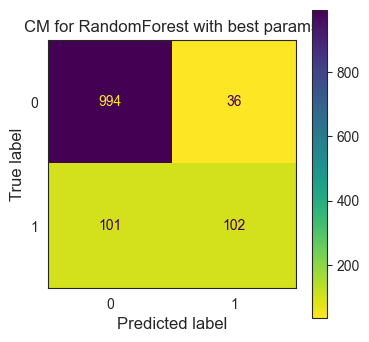

,Название модели,Accuracy,ROC_AUC,F1,Recall,Precision
0,Logistic Regression,0.864558,0.880453,0.430034,0.700000,0.310345
1,"KNN (default, 5)",0.866180,0.778292,0.448161,0.697917,0.330049
2,KNN (9),0.857259,0.808618,0.366906,0.680000,0.251232
3,RandomForest,0.890511,0.920085,0.604106,0.746377,0.507389
4,RandomForest with best params,0.888889,0.923067,0.598240,0.739130,0.502463


In [42]:
my_confusion_matrix(y_test, y_pred, best_model, 'RandomForest with best params')
results.loc[len(results)] = [f'RandomForest with best params'] + my_metrics(y_test, y_pred, y_pred_proba)
results

Можно проверить, как изменилась важности признаков для этой модели Random Forest с оптимизированными гиперпараметрами

In [43]:
# feature_importance_rf = pd.DataFrame({'Importance': best_model.feature_importances_}, index = X_train.columns).sort_values(by='Importance', ascending = False)

# plt.figure(figsize=(10, 5))
# sns.barplot(y = feature_importance_rf.index, x = feature_importance_rf['Importance'], hue = feature_importance_rf.index, palette='viridis')
# plt.title('Feature Importance according to Random Forest model')
# plt.ylabel('Feature name')
# plt.show()

# print('Самые значимые 10 признаков:')
# feature_importance_rf.head(10)

## 2.5. CatBoost классификатор

In [44]:
X_cb = df.drop(columns = 'Revenue')

X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y, test_size=0.1, random_state=42, shuffle=True)
print(f"Размеры обучающей выборки: X_train {X_train_cb.shape}, y_train {y_train_cb.shape}")
print(f"Размеры тестовой выборки: X_test {X_test_cb.shape}, y_test {y_test_cb.shape}")

Размеры обучающей выборки: X_train (11097, 17), y_train (11097,)
Размеры тестовой выборки: X_test (1233, 17), y_test (1233,)


In [45]:
#Проверка соответствия индексов новых train, test, которые будут использоваться в CatBoost по сравнению с предыдущими 

print('Совпадает',(X_train_cb.index == X_train.index).sum(),'/',X_train_cb.shape[0],'индексов')
print('Совпадает',(X_test_cb.index == X_test.index).sum(),'/',X_test_cb.shape[0],'индексов')

Совпадает 11097 / 11097 индексов
Совпадает 1233 / 1233 индексов


Сделаем некоторые преобразования над признаками, расширив список категориальных (ранее было 'Month', 'VisitorType') еще дополнительно 'SpecialDay',
'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend'

Применять one-hot encoding не понадобится, так как catboost умеет работать с категориями, но есть некоторые ограничения по типу этих категорий, поэтому преобразуем 'SpecialDay' (который сейчас float) к строковому типу.

Стандартизировать данные для CatBoost не требуется.

In [46]:
# альтернативный набор категориальных признаков, без special day
# cat_columns = ['Month',
#        'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
#        'Weekend']

cat_columns = ['SpecialDay','Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']
X_train_cb['SpecialDay'] = X_train_cb['SpecialDay'].astype('str')
X_test_cb['SpecialDay'] = X_test_cb['SpecialDay'].astype('str')

In [47]:
X_train_cb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11097 entries, 4867 to 7270
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11097 non-null  int64  
 1   Administrative_Duration  11097 non-null  float64
 2   Informational            11097 non-null  int64  
 3   Informational_Duration   11097 non-null  float64
 4   ProductRelated           11097 non-null  int64  
 5   ProductRelated_Duration  11097 non-null  float64
 6   BounceRates              11097 non-null  float64
 7   ExitRates                11097 non-null  float64
 8   PageValues               11097 non-null  float64
 9   SpecialDay               11097 non-null  object 
 10  Month                    11097 non-null  object 
 11  OperatingSystems         11097 non-null  int64  
 12  Browser                  11097 non-null  int64  
 13  Region                   11097 non-null  int64  
 14  TrafficType              

In [48]:
cb_clf = CatBoostClassifier(iterations = 1000, random_seed=42)
cb_clf.fit(X_train_cb, y_train, cat_features=cat_columns,  verbose=100)

Learning rate set to 0.02879
0:	learn: 0.6582848	total: 205ms	remaining: 3m 25s
100:	learn: 0.2162397	total: 4.06s	remaining: 36.1s
200:	learn: 0.2038941	total: 7.84s	remaining: 31.2s
300:	learn: 0.1957994	total: 12.4s	remaining: 28.8s
400:	learn: 0.1870967	total: 16.3s	remaining: 24.4s
500:	learn: 0.1785852	total: 20.2s	remaining: 20.1s
600:	learn: 0.1711668	total: 24.1s	remaining: 16s
700:	learn: 0.1645668	total: 28.9s	remaining: 12.3s
800:	learn: 0.1584477	total: 32.8s	remaining: 8.15s
900:	learn: 0.1525110	total: 36.8s	remaining: 4.04s
999:	learn: 0.1471288	total: 40.9s	remaining: 0us


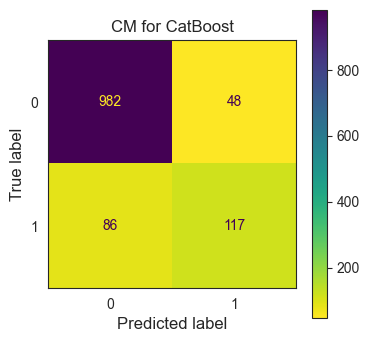

,Название модели,Accuracy,ROC_AUC,F1,Recall,Precision
0,Logistic Regression,0.864558,0.880453,0.430034,0.700000,0.310345
1,"KNN (default, 5)",0.866180,0.778292,0.448161,0.697917,0.330049
2,KNN (9),0.857259,0.808618,0.366906,0.680000,0.251232
3,RandomForest,0.890511,0.920085,0.604106,0.746377,0.507389
4,RandomForest with best params,0.888889,0.923067,0.598240,0.739130,0.502463
5,CatBoost,0.891322,0.929968,0.635870,0.709091,0.576355


In [49]:
y_pred = cb_clf.predict(X_test_cb)
y_pred_proba = cb_clf.predict_proba(X_test_cb)
predictions_proba.append(y_pred_proba[:,1])

my_confusion_matrix(y_test, y_pred, cb_clf, 'CatBoost')
results.loc[len(results)] = [f'CatBoost'] + my_metrics(y_test, y_pred, y_pred_proba)
results

Оценка важности признаков с помощью встроенного метода get_feature_importance() и визуализация результатов

Следует отметить, что данный метод для получения важности не зависит от масштаба признаков. Модель CatBoost не требует от предварительной стандартизации признаков, именно поэтому для этой модели были построены отдельные train и test выборки структурой, отличной от других моделей

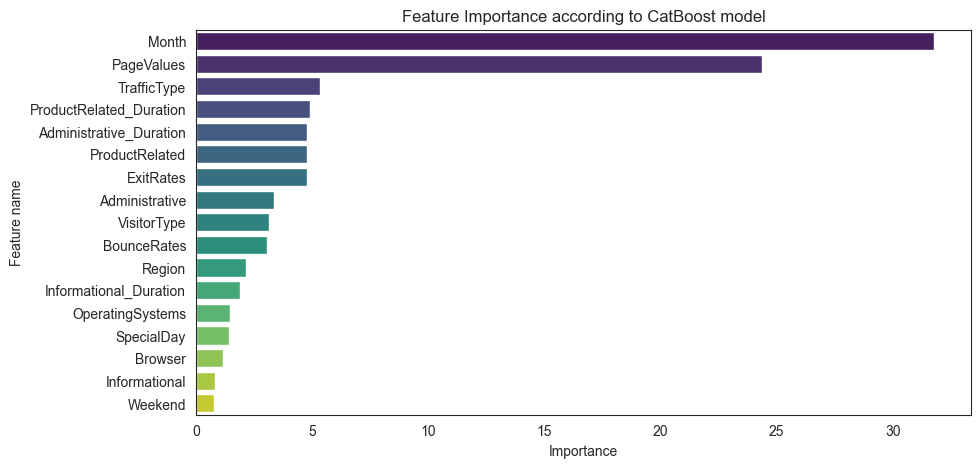

Самые значимые 10 признаков:


,Importance
Month,31.774177
PageValues,24.368002
TrafficType,5.338971
ProductRelated_Duration,4.905832
Administrative_Duration,4.793672
ProductRelated,4.792373
ExitRates,4.768175
Administrative,3.380530
VisitorType,3.150132
BounceRates,3.041462


In [50]:
feature_importance_cb = pd.DataFrame({'Importance': cb_clf.get_feature_importance()}, index = X_train_cb.columns).sort_values(by='Importance', ascending = False)

plt.figure(figsize=(10, 5))
sns.barplot(y = feature_importance_cb.index, x = feature_importance_cb['Importance'], hue = feature_importance_cb.index, palette='viridis')
plt.title('Feature Importance according to CatBoost model')
plt.ylabel('Feature name')
plt.show()

print('Самые значимые 10 признаков:')
feature_importance_cb.head(10)

## 2.6. XGBoost классификатор

In [51]:
X_train_cb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11097 entries, 4867 to 7270
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11097 non-null  int64  
 1   Administrative_Duration  11097 non-null  float64
 2   Informational            11097 non-null  int64  
 3   Informational_Duration   11097 non-null  float64
 4   ProductRelated           11097 non-null  int64  
 5   ProductRelated_Duration  11097 non-null  float64
 6   BounceRates              11097 non-null  float64
 7   ExitRates                11097 non-null  float64
 8   PageValues               11097 non-null  float64
 9   SpecialDay               11097 non-null  object 
 10  Month                    11097 non-null  object 
 11  OperatingSystems         11097 non-null  int64  
 12  Browser                  11097 non-null  int64  
 13  Region                   11097 non-null  int64  
 14  TrafficType              

XGBoost также как и CatBoost не требует стандартизации признаков и умеет работать с категориальными признаками, будем использовать обучающую и тестовую выборки, полученные для модели CatBoost. Необходимо только изменить тип данных для категориальных переменных (для CatBoost было необходимо, чтобы категориальные переменные были целыми или строковыми) - на 'categorical'

In [52]:
X_train_cb[cat_columns]=X_train_cb[cat_columns].astype('category')
X_test_cb[cat_columns]=X_test_cb[cat_columns].astype('category')

In [53]:
xgb_model = xgb.XGBClassifier(enable_categorical=True, n_estimators = 1000)
xgb_model.fit(X_train_cb, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

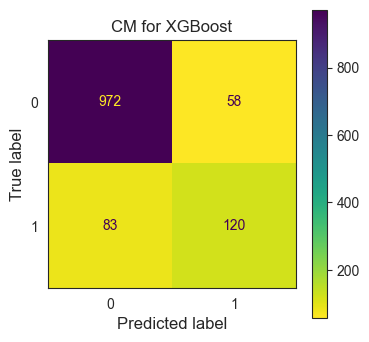

,Название модели,Accuracy,ROC_AUC,F1,Recall,Precision
0,Logistic Regression,0.864558,0.880453,0.430034,0.700000,0.310345
1,"KNN (default, 5)",0.866180,0.778292,0.448161,0.697917,0.330049
2,KNN (9),0.857259,0.808618,0.366906,0.680000,0.251232
3,RandomForest,0.890511,0.920085,0.604106,0.746377,0.507389
4,RandomForest with best params,0.888889,0.923067,0.598240,0.739130,0.502463
5,CatBoost,0.891322,0.929968,0.635870,0.709091,0.576355
6,XGBoost,0.885645,0.903018,0.629921,0.674157,0.591133


In [54]:
y_pred = xgb_model.predict(X_test_cb)
y_pred_proba = xgb_model.predict_proba(X_test_cb)
predictions_proba.append(y_pred_proba[:,1])
my_confusion_matrix(y_test, y_pred, xgb_model, 'XGBoost')
results.loc[len(results)] = [f'XGBoost'] + my_metrics(y_test, y_pred, y_pred_proba, i=1)
results

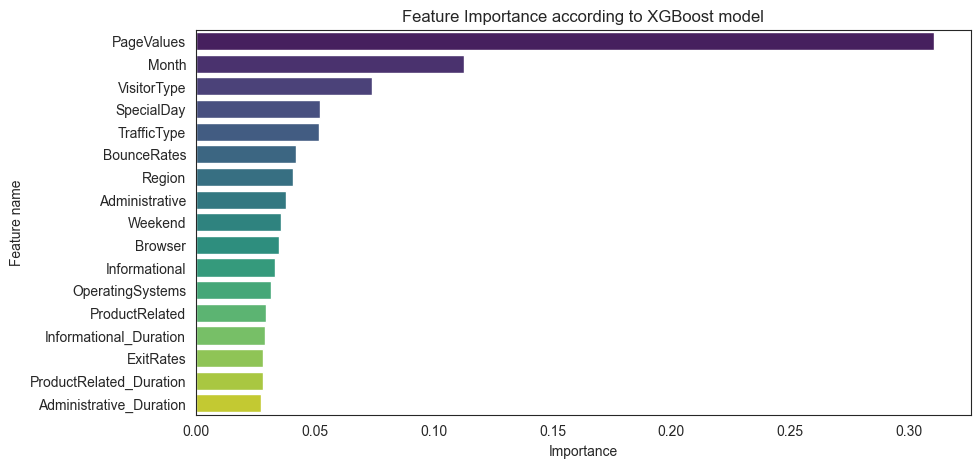

Самые значимые 10 признаков:


,Importance
PageValues,0.310548
Month,0.112831
VisitorType,0.074058
SpecialDay,0.052274
TrafficType,0.051803
BounceRates,0.041984
Region,0.040890
Administrative,0.037774
Weekend,0.035694
Browser,0.034777


In [55]:
feature_importance_xgb = pd.DataFrame({'Importance': xgb_model.feature_importances_}, index = X_train_cb.columns).sort_values(by='Importance', ascending = False)

plt.figure(figsize=(10, 5))
sns.barplot(y = feature_importance_xgb.index, x = feature_importance_xgb['Importance'], hue = feature_importance_xgb.index, palette='viridis')
plt.title('Feature Importance according to XGBoost model')
plt.ylabel('Feature name')
plt.show()

print('Самые значимые 10 признаков:')
feature_importance_xgb.head(10)



### XGB with GridSearch

In [56]:
%%time

params = {
    'n_estimators': [100, 500, 1000],       
    'learning_rate': [0.01, 0.05, 0.1],     
    'max_depth': [3, 5, 7],                  
    # 'subsample': [0.8, 0.9, 1.0],            
    # 'colsample_bytree': [0.8, 0.9, 1.0]      
}

xgb_model = xgb.XGBClassifier(enable_categorical=True)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params,
                           scoring='accuracy', cv=5, verbose=1)

grid_search.fit(X_train_cb, y_train)
best_model = grid_search.best_estimator_
print('Лучшие найденные параметры для модели:',grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Лучшие найденные параметры для модели: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
CPU times: total: 7min 42s
Wall time: 2min 22s


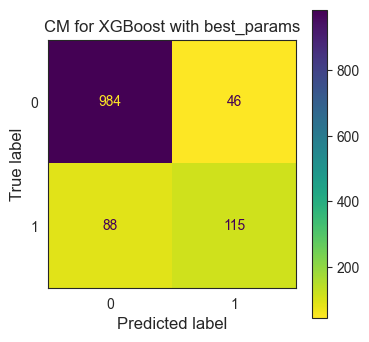

,Название модели,Accuracy,ROC_AUC,F1,Recall,Precision
0,Logistic Regression,0.864558,0.880453,0.430034,0.700000,0.310345
1,"KNN (default, 5)",0.866180,0.778292,0.448161,0.697917,0.330049
2,KNN (9),0.857259,0.808618,0.366906,0.680000,0.251232
3,RandomForest,0.890511,0.920085,0.604106,0.746377,0.507389
4,RandomForest with best params,0.888889,0.923067,0.598240,0.739130,0.502463
5,CatBoost,0.891322,0.929968,0.635870,0.709091,0.576355
6,XGBoost,0.885645,0.903018,0.629921,0.674157,0.591133
7,XGBoost with best_params,0.891322,0.923248,0.631868,0.714286,0.566502


In [57]:
y_pred = best_model.predict(X_test_cb)
y_pred_proba = best_model.predict_proba(X_test_cb)
predictions_proba.append(y_pred_proba[:,1])

my_confusion_matrix(y_test, y_pred, best_model, 'XGBoost with best_params')
results.loc[len(results)] = [f'XGBoost with best_params'] + my_metrics(y_test, y_pred, y_pred_proba)
results

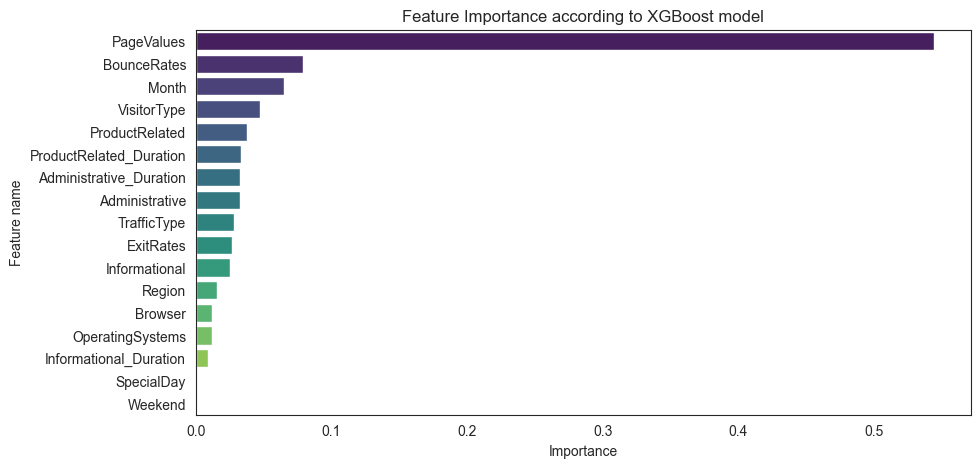

Самые значимые 10 признаков:


,Importance
PageValues,0.544381
BounceRates,0.078854
Month,0.064962
VisitorType,0.047271
ProductRelated,0.037889
ProductRelated_Duration,0.033453
Administrative_Duration,0.032849
Administrative,0.032632
TrafficType,0.027797
ExitRates,0.026442


In [58]:
feature_importance_xgb = pd.DataFrame({'Importance': best_model.feature_importances_}, index = X_train_cb.columns).sort_values(by='Importance', ascending = False)

plt.figure(figsize=(10, 5))
sns.barplot(y = feature_importance_xgb.index, x = feature_importance_xgb['Importance'], hue = feature_importance_xgb.index, palette='viridis')
plt.title('Feature Importance according to XGBoost model')
plt.ylabel('Feature name')
plt.show()

print('Самые значимые 10 признаков:')
feature_importance_xgb.head(10)



# 3. Заключение


В результате мы собрали данные по работе каждой модели (с ее вариациями, например оптимизированными гиперпараметрами) на тестовой выборке. Достигнуты отличные значения для метрик качества accuracy, roc_auc. Но как мне кажется, в этом соревновании выиграла модель CatBoost (хотя по метрике accuracy у нее такой же результат, как у оптимизированного XGBoost)

Кстати только CatBoost по важности признаков отдала первое место важности признаку Month. Остальные модели отдавали приоритет PageValues (именно этот признак имеет самую значительную кореляцию с целевой переменной)

In [59]:
results = results.sort_values(by='ROC_AUC', ascending=False)
index_sort = list(results.index)
results

,Название модели,Accuracy,ROC_AUC,F1,Recall,Precision
5,CatBoost,0.891322,0.929968,0.635870,0.709091,0.576355
7,XGBoost with best_params,0.891322,0.923248,0.631868,0.714286,0.566502
4,RandomForest with best params,0.888889,0.923067,0.598240,0.739130,0.502463
3,RandomForest,0.890511,0.920085,0.604106,0.746377,0.507389
6,XGBoost,0.885645,0.903018,0.629921,0.674157,0.591133
0,Logistic Regression,0.864558,0.880453,0.430034,0.700000,0.310345
2,KNN (9),0.857259,0.808618,0.366906,0.680000,0.251232
1,"KNN (default, 5)",0.866180,0.778292,0.448161,0.697917,0.330049


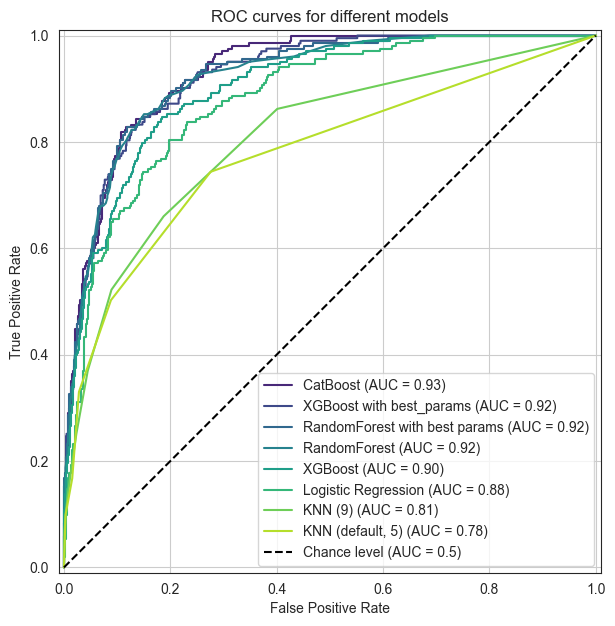

In [60]:
predictions_proba = np.array(predictions_proba)

fig, ax = plt.subplots(figsize=(7, 10))

N = len(results)
roc_auc_palette = sns.color_palette('viridis', n_colors = N);


for i in range(N):
    RocCurveDisplay.from_predictions(
        y_test,
        y_pred = predictions_proba[index_sort][i],
        name= results['Название модели'].iloc[i],
        color=roc_auc_palette[i],
        ax=ax,
        plot_chance_level=(i == N-1),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC curves for different models",
)
ax.grid(True)
plt.show()


Визуализация ROC AUC кривых для всех построенных моделей: график визуализации ROC AUC кривых позволяет оценить качество классификационных моделей на тестовых данных, показывая, как меняется соотношение истинно положительных и ложноположительных результатов при различных порогах. Модель с большей площадью под кривой (AUC), в нашем случае Catboost, демонстрирует лучшее качество классификации.

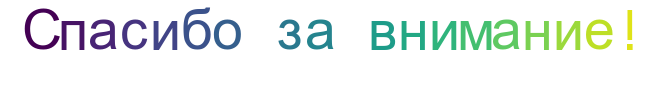

In [61]:
cmap = plt.get_cmap('viridis');
plt.figure(figsize=(8, 1))
text = 'Спасибо за внимание!'
for i in range(len(text)):
    plt.text(0.05 + i*0.05, 0.5, text[i], fontsize=40, color=cmap(i / len(text)), ha='center')
plt.axis('off')
plt.show()